In [3]:
# This code is part of Project Paper for WQU 690 Capstone Module
# Topic: Dynamic Analysis of Crude Oil and Refined Products
# Team member of Group 10 - Mohd Nazri Nawi, Indira Djambaeva, Xiaoyi Zhou


In [4]:
# EXPLORATORY DATA ANALYSIS - BASIC STATISTIC

# Libraries
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scipy.stats as stats
sns.set()

In [38]:
Crude = pd.read_excel('CrudePrices.xlsx', engine='openpyxl')
wti = Crude['WTI']
brent = Crude['BRENT']
bonny = Crude['BONNY']
date = Crude.Date


In [39]:
summary = Crude.describe()
summary = summary.transpose()
summary.head()

,count,mean,std,min,25%,50%,75%,max
WTI,1153.0,51.770703,11.948699,-36.98,46.030,52.38,59.2600,77.41
BRENT,1173.0,55.935772,13.877949,9.12,47.080,57.02,65.8700,86.07
BONNY,1158.0,56.829473,13.697584,14.67,48.425,57.41,66.6575,87.16


In [7]:
Crude.skew()

WTI     -0.875412
BRENT   -0.461461
BONNY   -0.461527
dtype: float64

In [8]:
Crude.kurtosis()

WTI      2.905073
BRENT   -0.023351
BONNY    0.021507
dtype: float64

            WTI     BRENT     BONNY
WTI    1.000000  0.971467  0.972645
BRENT  0.971467  1.000000  0.997171
BONNY  0.972645  0.997171  1.000000


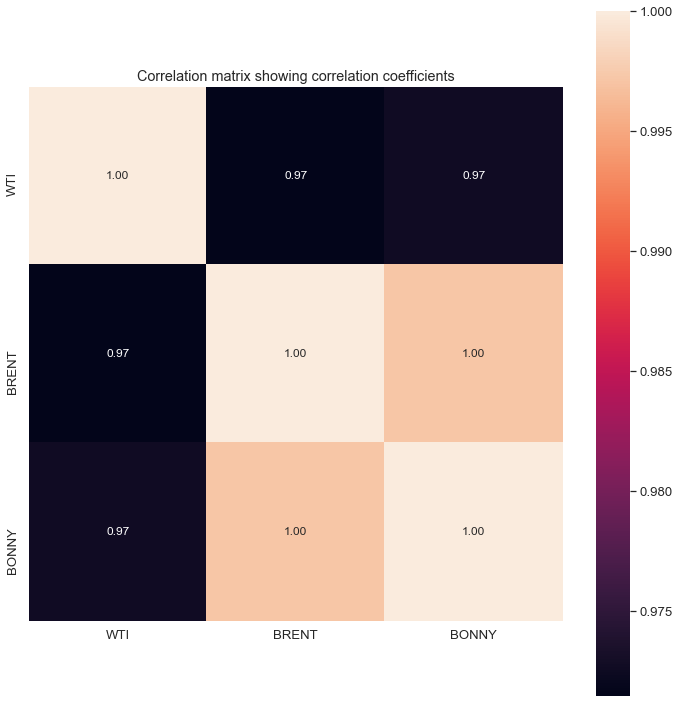

In [9]:
corrMatrix = Crude.corr()
print (corrMatrix)

cols = ['WTI', 'BRENT', 'BONNY']
plt.figure(figsize=(10,10))
sns.set(font_scale=1.2)


hm = sns.heatmap(corrMatrix,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Correlation matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

              WTI       BRENT       BONNY
WTI    142.771396  161.277267  159.584005
BRENT  161.277267  192.597455  189.913976
BONNY  159.584005  189.913976  187.623800


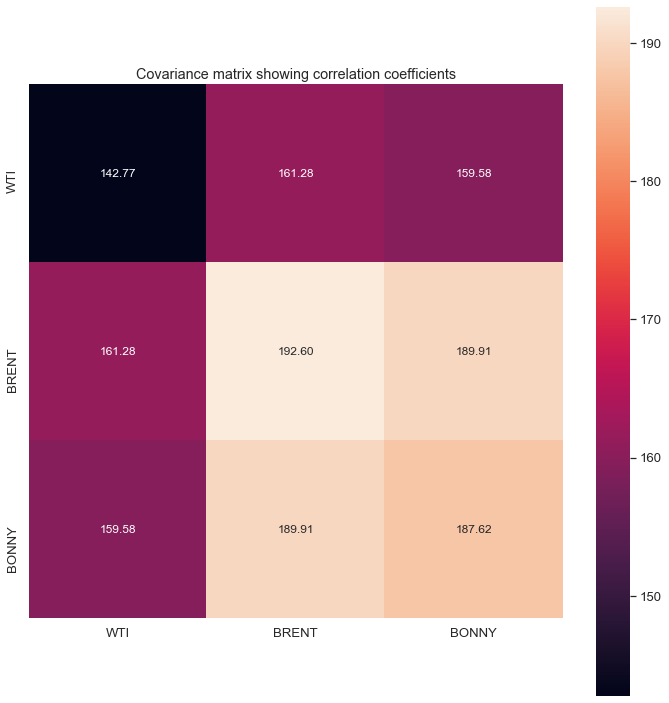

In [10]:
covMatrix = Crude.cov()
print (covMatrix)

cols = ['WTI', 'BRENT', 'BONNY']
plt.figure(figsize=(10,10))
sns.set(font_scale=1.2)


hm = sns.heatmap(covMatrix,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

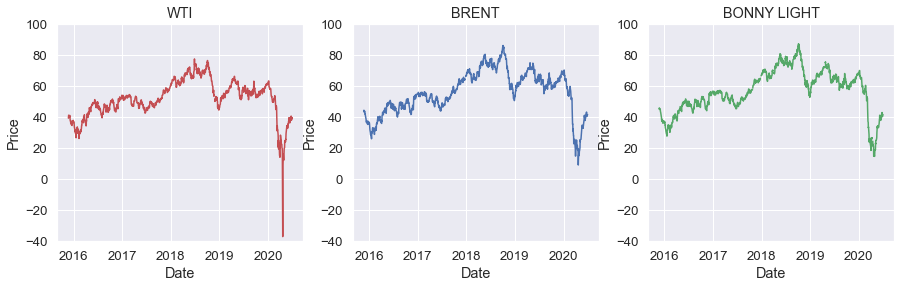

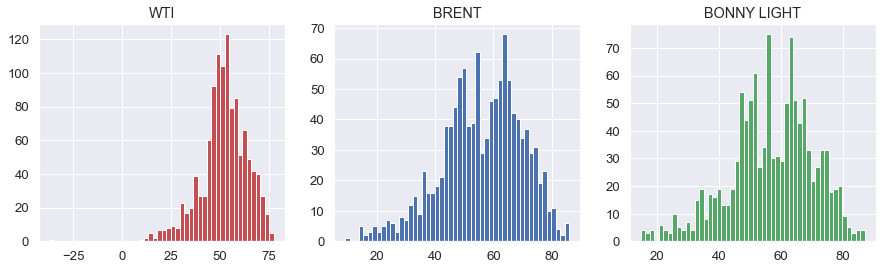

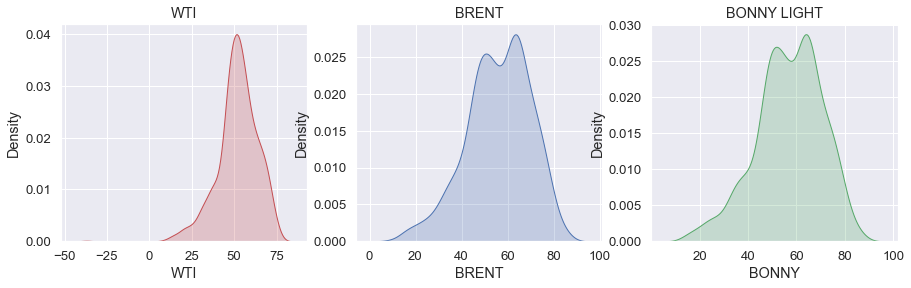

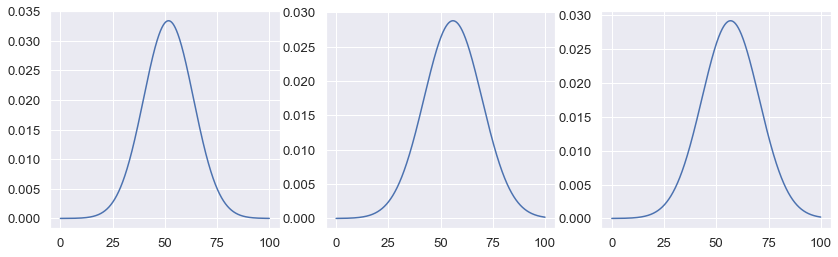

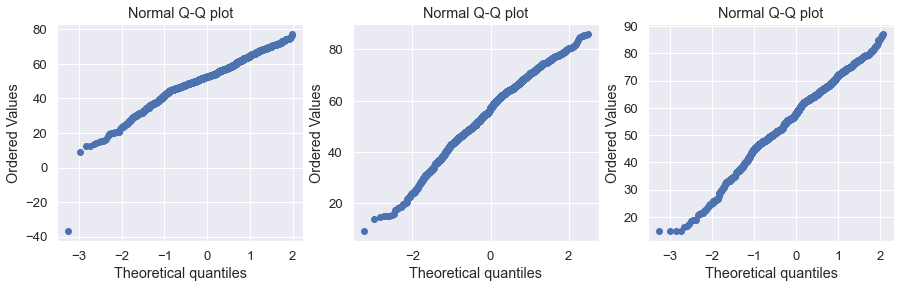

In [11]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.lineplot(x=date, y=wti, color="r")
plt.ylim(-40,100)
plt.ylabel('Price')
plt.title('WTI')


plt.subplot(1, 3, 2)
sns.lineplot(x=date, y=brent, color="b")
plt.ylim(-40,100)
plt.ylabel('Price')
plt.title('BRENT')

plt.subplot(1, 3, 3)
sns.lineplot(x=date, y=bonny, color="g")
plt.ylim(-40,100)
plt.ylabel('Price')
plt.title('BONNY LIGHT')

plt.show()

# Histogram

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
wti.hist(bins = 50, color="r")
plt.title('WTI')

plt.subplot(1, 3, 2)
brent.hist(bins = 50, color='b')
plt.title('BRENT')

plt.subplot(1, 3, 3)
bonny.hist(bins = 50, color='g')
plt.title('BONNY LIGHT')

plt.show()


# Density Distribution Plot

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.kdeplot(wti, shade=True, color="r")
plt.title('WTI')

plt.subplot(1, 3, 2)
sns.kdeplot(brent, shade=True, color="b")
plt.title('BRENT')

plt.subplot(1, 3, 3)
sns.kdeplot(bonny, shade=True, color="g")
plt.title('BONNY LIGHT')

plt.show()

# Gaussian Distribution Plot


plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
x_values = np.arange(0, 100, 0.01)
y_values = sp.stats.norm(wti.mean(), wti.std())
plt.plot(x_values, y_values.pdf(x_values))

plt.subplot(1, 3, 2)
x_values = np.arange(0, 100, 0.01)
y_values = sp.stats.norm(brent.mean(), brent.std())
plt.plot(x_values, y_values.pdf(x_values))

plt.subplot(1, 3, 3)
x_values = np.arange(0, 100, 0.01)
y_values = sp.stats.norm(bonny.mean(), bonny.std())
plt.plot(x_values, y_values.pdf(x_values))

plt.show()

# Q-Q Plot

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)

stats.probplot(wti, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")

plt.subplot(1, 3, 2)

stats.probplot(brent, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")

plt.subplot(1, 3, 3)
stats.probplot(bonny, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

<AxesSubplot:>

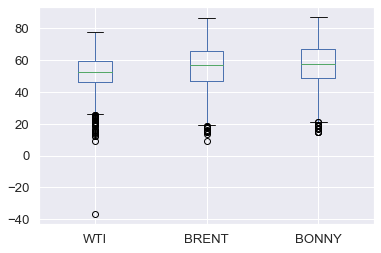

In [12]:
Crude.plot(kind = 'box')

WTI: mean=51.771 stdv=11.944
BRENT: mean=55.936 stdv=13.872
BONNY: mean=56.829 stdv=13.692


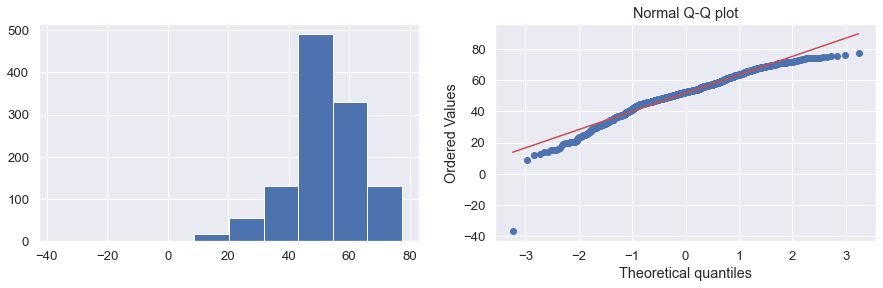

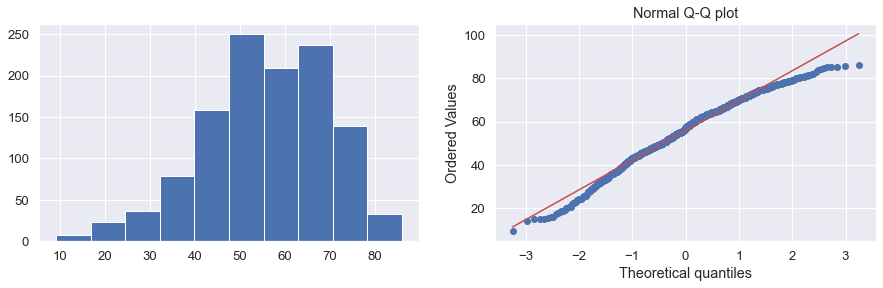

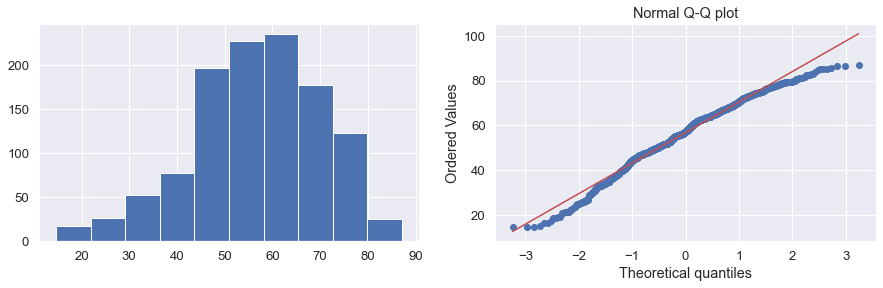

Statistics=0.961, p=0.000
Sample does not look Gaussian (reject H0)


In [13]:
# generate gaussian data
import scipy.stats as stats
from numpy import mean
from numpy import std
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import shapiro

# summarize
wti = wti.dropna()
print('WTI:', 'mean=%.3f stdv=%.3f' % (mean(wti), std(wti)))

brent = brent.dropna()
print('BRENT:', 'mean=%.3f stdv=%.3f' % (mean(brent), std(brent)))

bonny = bonny.dropna()
print('BONNY:', 'mean=%.3f stdv=%.3f' % (mean(bonny), std(bonny)))


plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.hist(wti)

plt.subplot(1, 2, 2)
stats.probplot(wti, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.hist(brent)

plt.subplot(1, 2, 2)
stats.probplot(brent, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.hist(bonny)

plt.subplot(1, 2, 2)
stats.probplot(bonny, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()


# normality test
stat, p = shapiro(wti)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

mean=51.771 stdv=11.944


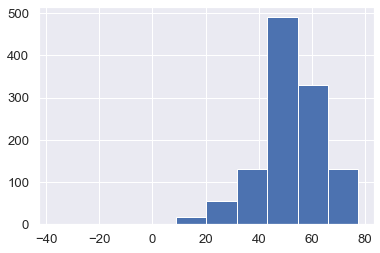

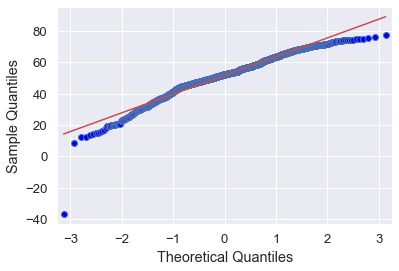

Statistics=0.961, p=0.00000
Sample does not look Gaussian (reject H0)
Statistics=196.063, p=0.000
Sample does not look Gaussian (reject H0)
Statistic: 7.12749
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.784, data does not look normal (reject H0)
2.500: 0.915, data does not look normal (reject H0)
1.000: 1.088, data does not look normal (reject H0)


In [14]:
# summarize
data = wti.dropna()
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))
pyplot.hist(data)
pyplot.show()

qqplot(data, line='s')
pyplot.show()

# normality test - Shapiro-Wilk Test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
    
from scipy.stats import normaltest

# D’Agostino’s K^2 Test

stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
    
    
from scipy.stats import anderson
# seed the random number generator

result = anderson(data)
print('Statistic: %.5f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

In [15]:
# AR example
from statsmodels.tsa.ar_model import AutoReg
from random import random
# contrived dataset

# fit model
model = AutoReg(wti, lags=1)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(wti), len(wti))
print(yhat)

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


1153    39.53878
dtype: float64


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


mean=55.936 stdv=13.872


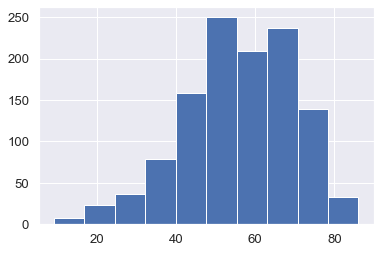

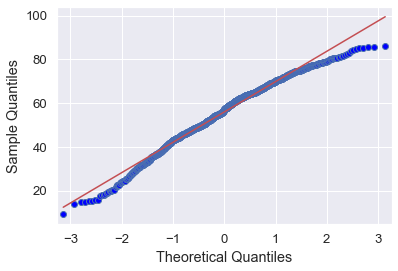

Statistics=0.983, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=38.287, p=0.000
Sample does not look Gaussian (reject H0)
Statistic: 4.236
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.784, data does not look normal (reject H0)
2.500: 0.915, data does not look normal (reject H0)
1.000: 1.088, data does not look normal (reject H0)


In [19]:
# summarize
data = brent.dropna()
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))
pyplot.hist(data)
pyplot.show()

qqplot(data, line='s')
pyplot.show()

# normality test - Shapiro-Wilk Test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
    
from scipy.stats import normaltest

# D’Agostino’s K^2 Test

stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
    
    
from scipy.stats import anderson
# seed the random number generator

result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

In [21]:
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot

values = DataFrame(wti.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.978517
t+1  0.978517  1.000000


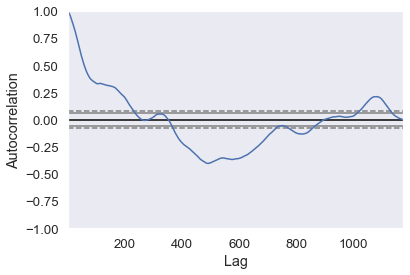

In [22]:
from pandas.plotting import autocorrelation_plot
series = brent.dropna()
autocorrelation_plot(series)
pyplot.show()

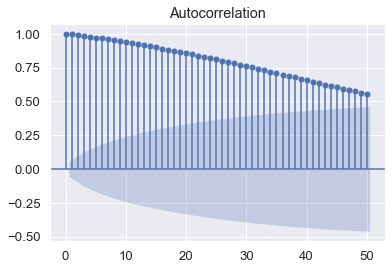

In [23]:

from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(series, lags=50)
pyplot.show()

Test MSE: 1.057


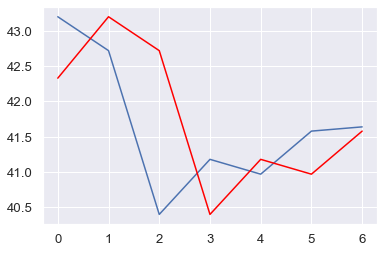

In [24]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
	return x

# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

Coefficients: [ 4.60889801e-01  9.99159827e-01 -2.03829117e-02  5.79045607e-02
 -2.17447432e-02 -4.29844181e-03  2.88893833e-02 -1.39318223e-02
  3.58009808e-02 -6.24526645e-02 -3.06821687e-02  2.91467888e-03
  1.46248090e-02  5.41113011e-02 -3.22021645e-02  2.27327572e-02
 -2.23371965e-02 -1.65080454e-02 -5.43675105e-02  5.30070287e-02
  5.65701726e-03 -1.49201074e-04  1.41870688e-03  1.81051316e-02
  6.70231608e-02 -7.97799876e-02  2.24420901e-02 -7.85692274e-03
 -4.55245588e-02  2.03901756e-02]
predicted=42.918169, expected=43.200000
predicted=43.073938, expected=42.720000
predicted=43.680377, expected=40.400000
predicted=43.897728, expected=41.180000
predicted=44.209064, expected=40.970000
predicted=44.461581, expected=41.580000
predicted=44.369158, expected=41.640000
Test RMSE: 2.524


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


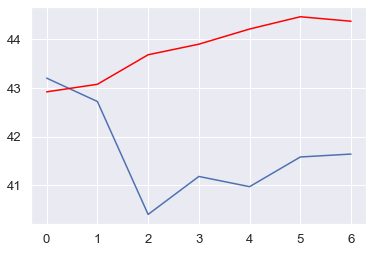

In [26]:
# create and evaluate a static autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [27]:
# AR example
from statsmodels.tsa.ar_model import AutoReg
from random import random
# contrived dataset
data = Crude.WTI.dropna()
# fit model
model = AutoReg(data, lags=1)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

1153    39.53878
dtype: float64


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will c

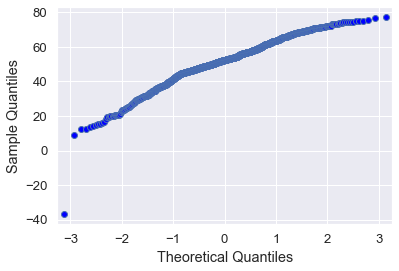

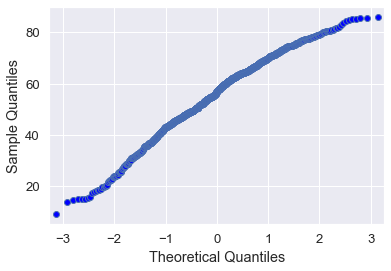

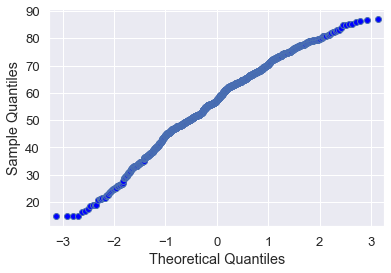

In [28]:
import numpy as np 
import statsmodels.api as sm 
import pylab as py 
    
sm.qqplot(wti)
sm.qqplot(brent)
sm.qqplot(bonny) 
py.show()

In [29]:

# Example of the Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import adfuller

stat, p, lags, obs, crit, t = adfuller(wti.dropna())
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')


stat=-2.267, p=0.183
Probably not Stationary


In [ ]:
Crude.cov() 

In [41]:
prices = pd.read_excel('Price_Monthly.xlsx', engine='openpyxl')


In [42]:
prices_stats = prices.describe()
prices_stats = prices_stats.transpose()
print(prices_stats)

           count          mean          std           min           25%  \
WTI         56.0     51.596668    11.609753     16.257000     45.541309   
BRENT       56.0     55.695442    13.784287     18.378500     46.512403   
BONNY       56.0     56.609344    13.587582     20.536500     47.687739   
USDiesel    56.0    116.362545    15.234757     83.949580    103.518908   
UKDiesel    56.0    260.418359    20.495030    215.304114    246.335427   
NGDiesel    56.0     84.317281    11.386815     58.729412     76.052409   
USGas       56.0    106.093938    11.852924     78.655462     98.455882   
UKGas       56.0    251.931378    17.492212    216.117473    241.009857   
NGGas       56.0     57.624862     5.638373     38.334459     59.341908   
CrudeProd   56.0  81432.395500  2354.248729  70357.260000  80912.490750   
PetProd     56.0  98961.494107  2618.125575  88545.624000  97798.297250   

                    50%            75%            max  
WTI           51.743524      57.883120     

In [48]:
import statistics 
print("Variance of sample set is % s" 
      %(statistics.variance(prices.WTI)))
print("Variance of sample set is % s" 
      %(statistics.variance(prices.BRENT))) 
print("Variance of sample set is % s" 
      %(statistics.variance(prices.BONNY))) 

Variance of sample set is 134.7863719240061
Variance of sample set is 190.00657937478846
Variance of sample set is 184.62239558299052


data1: mean=51.597 stdv=11.506
data2: mean=116.363 stdv=15.098


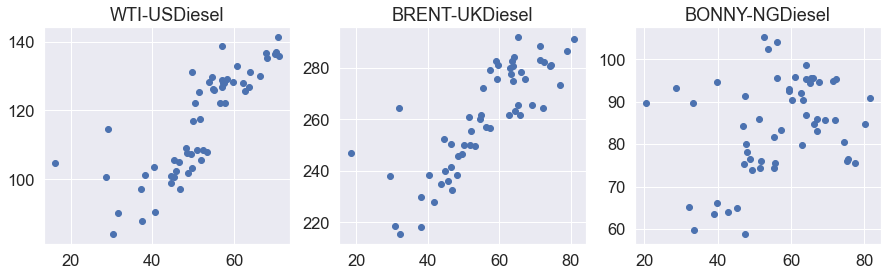

In [49]:
# generate related variables
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot

data1 = prices.WTI
data2 = prices.USDiesel
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

# plot

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
pyplot.scatter(data1, data2)
plt.title("WTI-USDiesel")


plt.subplot(1, 3, 2)
pyplot.scatter(prices.BRENT, prices.UKDiesel)
plt.title("BRENT-UKDiesel")


plt.subplot(1, 3, 3)
pyplot.scatter(prices.BONNY, prices.NGDiesel)
plt.title("BONNY-NGDiesel")
pyplot.show()

In [51]:
# calculate the pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr

# calculate Pearson's correlation
corr, p = pearsonr(data1, data2)
# display the correlation
print('Pearsons correlation: %.3f' % corr)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('No correlation (fail to reject H0)')
else:
    print('Some correlation (reject H0)')

Pearsons correlation: 0.815
Some correlation (reject H0)


In [54]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.900, p=0.000
Probably dependent


In [56]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

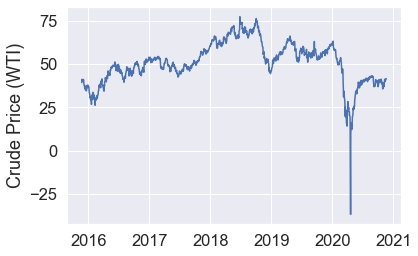

In [57]:
df = pd.read_csv('WTIPrices.csv', parse_dates = ['Date'], index_col = ['Date'])
df = df.dropna()
df.head()
plt.ylabel('Crude Price (WTI)')
plt.plot(df)

In [89]:
result = adfuller(df['WTI'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -2.329644945536107
p-value: 0.162585037862636
Critical Values:
	1%: -3.435651725648415
	5%: -2.863881223119536
	10%: -2.568016498910778


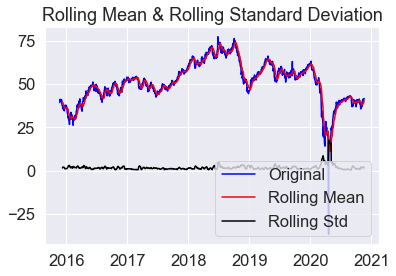

In [65]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [69]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['WTI'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

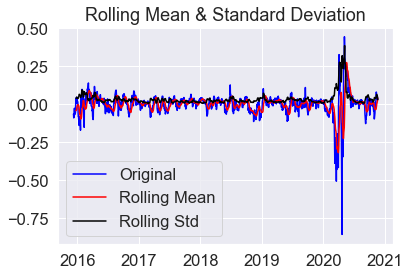

ADF Statistic: -6.017193698145498
p-value: 1.523726680587875e-07
Critical Values:
	1%: -3.435730242325657
	5%: -2.863915864680021
	10%: -2.5680349476516726


In [70]:
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

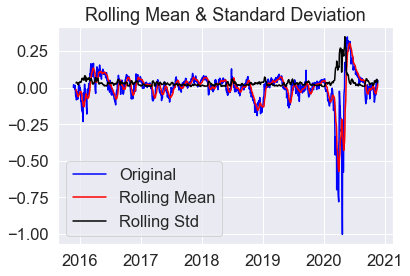

ADF Statistic: -5.2099217670963025
p-value: 8.391141382421171e-06
Critical Values:
	1%: -3.4356819860439574
	5%: -2.863894574114006
	10%: -2.568023609111511


In [71]:
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

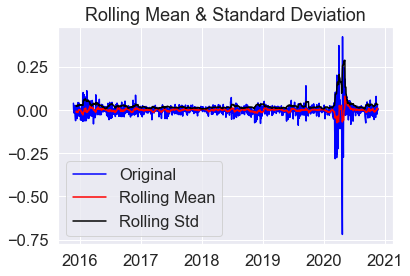

ADF Statistic: -6.506881970535311
p-value: 1.125403351358526e-08
Critical Values:
	1%: -3.4356819860439574
	5%: -2.863894574114006
	10%: -2.568023609111511


In [72]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

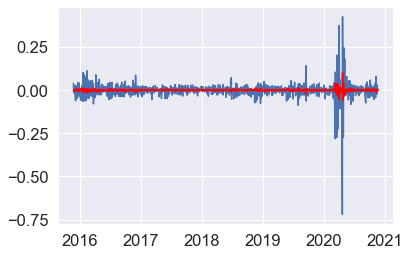

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_log, model='additive', period=1) 
model = ARIMA(df_log, order=(1,1,0))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

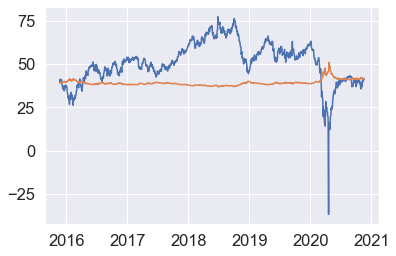

In [88]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['WTI'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)

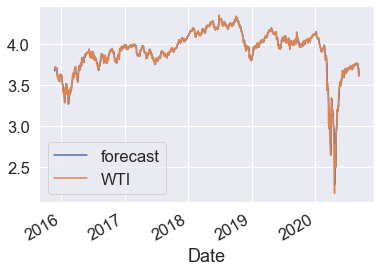

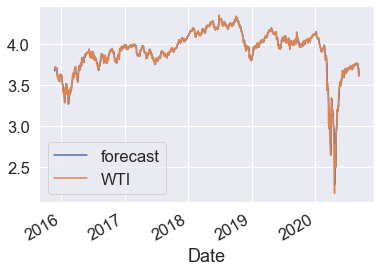

In [87]:
results.plot_predict(1,1200)

In [ ]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
pyplot.figure(figsize=(15,15))

series = df_log
result = seasonal_decompose(series, model='additive', period=1)
result.plot()

pyplot.show()


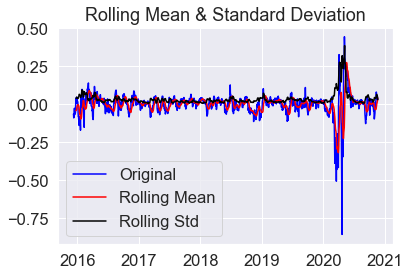

ADF Statistic: -6.017193698145498
p-value: 1.523726680587875e-07
Critical Values:
	1%: -3.435730242325657
	5%: -2.863915864680021
	10%: -2.5680349476516726


In [78]:
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

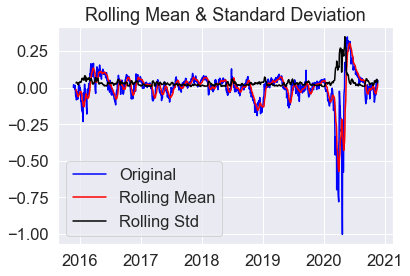

ADF Statistic: -5.2099217670963025
p-value: 8.391141382421171e-06
Critical Values:
	1%: -3.4356819860439574
	5%: -2.863894574114006
	10%: -2.568023609111511


In [79]:
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)